In [31]:


import random
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
%matplotlib widget

# Class Definition
The flower has a DNA sequence with 11 chromosomes 3 color channels for the center , petals and stem the number of petals and the size of the center .
There is also a function to print the details of each flower
(limits for each chromosome like the range 0-255 in each **RGB** channel will be handled by setting limits for the random function later on)

In [32]:
class Flower :
    def __init__(self,sizeOfCenter,colorOfCenter,colorOfPetals,colorOfStem,numberOfPetals):
        self.sizeOfCenter = sizeOfCenter
        self.colorOfCenter = colorOfCenter #rgb tuple
        self.colorOfPetals = colorOfPetals #rbg tuple
        self.colorOfStem = colorOfStem # rgb tuple
        self.numberOfPetals = numberOfPetals
        self.hoverTime = 0.0
        self.hoverStart = None

    @staticmethod
    def repair(value, low, high):
        if isinstance(value, tuple):
            # handle (R,G,B)
            fixed = list(value[:3])
            while len(fixed) < 3:
                fixed.append(0)
            return tuple(max(low, min(v, high)) for v in fixed)
        return max(low, min(value, high))



    def startHover(self):
        if self.hoverStart is None:
            self.hoverStart = time.time()

    def stopHover(self):
        if self.hoverStart is not None:
            self.hoverTime += time.time() - self.hoverStart
            self.hoverStart = None


    def getHoverTime(self):
        return self.hoverTime



    def getSizeOfCenter(self):
        return self.sizeOfCenter

    def getColorOfCenter(self):
        return self.colorOfCenter

    def getColorOfPetals(self):
        return self.colorOfPetals

    def getColorOfStem(self):
        return self.colorOfStem

    def getNumberOfPetals(self):
        return self.numberOfPetals

    def setSizeOfCenter(self,size):
        if 5 <= size <= 15:
            self.sizeOfCenter = size
        else:
            self.sizeOfCenter = self.repair(size, 5, 15)



    def setColorOfCenter(self,colorOfCenter):
        if (
        isinstance(colorOfCenter, tuple) and
        len(colorOfCenter) == 3 and
        all(0 <= v <= 255 for v in colorOfCenter)
        ):
            self.colorOfCenter = colorOfCenter
        else:
            self.colorOfCenter = self.repair(colorOfCenter, 0, 255)

    def setColorOfPetals(self,colorOfPetals):
        if (
        isinstance(colorOfPetals, tuple) and
        len(colorOfPetals) == 3 and
        all(0 <= v <= 255 for v in colorOfPetals)
        ):
            self.colorOfPetals = colorOfPetals
        else:
            self.colorOfPetals = self.repair(colorOfPetals, 0, 255)


    def setColorOfStem(self,colorOfStem):
        if (
        isinstance(colorOfStem, tuple) and
        len(colorOfStem) == 3 and
        all(0 <= v <= 255 for v in colorOfStem)
        ):
            self.colorOfStem = colorOfStem
        else:
            self.colorOfStem = self.repair(colorOfStem, 0, 255)

    def setNumberOfPetals(self,numberOfPetals):
        if 0 <= numberOfPetals <= 7:
            self.numberOfPetals = numberOfPetals
        else:
            self.numberOfPetals = self.repair(numberOfPetals, 0, 7)

    def printDetails(self):
        print("🌼 Flower Details 🌼")
        print(f"Center size       : {self.sizeOfCenter}")
        print(f"Number of petals  : {self.numberOfPetals}")
        print(f"Center color (RGB): {self.colorOfCenter}")
        print(f"Petal color  (RGB): {self.colorOfPetals}")
        print(f"Stem color   (RGB): {self.colorOfStem}")
        print("-" * 35)


In [33]:
def randomColor() :
    return (random.randint(0, 255),random.randint(0, 255),random.randint(0, 255))


def normalizeRGB (rbg_tuple):
    return tuple(v/255 for v in rbg_tuple)


In [34]:
gen_num = 1
population_size = 8
gen_dict = {}

def initPop (size , dictionary):
    population = []
    for i in range(size):
        center = round(random.uniform(1,5),2) # 2 decimal places
        color_center = randomColor()
        color_petals = randomColor()
        stem_color = randomColor()
        petals= random.randint(0,7)
        flower = Flower(center,color_center,color_petals,stem_color,petals)
        population.append(flower)
    dictionary[f"Generation{gen_num}"] = population

    return population


In [61]:


def draw_generation(population):
    # Each flower gets its own "panel"
    fig, axes = plt.subplots(
        1, len(population),
        figsize=(len(population) * 1.5, 4.5)
    )
    plt.subplots_adjust(wspace=0.5, left=0.04, right=0.96, bottom=0.15)

    for idx, (ax, flower) in enumerate(zip(axes, population)):
        ax.set_aspect('equal')
        ax.set_facecolor("#E1E0DA")   
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-1.0, 0.6)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    

        # --- Draw stem ---
        center_radius = flower.sizeOfCenter * 0.05
        ax.plot([0, 0], [-0.9, -center_radius],
                color=normalizeRGB(flower.colorOfStem),
                linewidth=3, zorder=1)

        # --- Draw petals ---
        for i in range(max(1, flower.numberOfPetals)):
            angle = (2*np.pi / max(1, flower.numberOfPetals)) * i
            distance = center_radius + flower.sizeOfCenter * 0.04
            x = distance * np.cos(angle)
            y = distance * np.sin(angle)
            petal_radius = flower.sizeOfCenter * 0.05
            circle = plt.Circle((x, y), petal_radius,
                                color=normalizeRGB(flower.colorOfPetals),
                                 zorder=2)
            ax.add_patch(circle)

        # --- Draw center ---
        center_circle = plt.Circle((0, 0), center_radius,
                                   color=normalizeRGB(flower.colorOfCenter),
                                   zorder=3)
        ax.add_patch(center_circle)

        # --- Box around each flower ---
        for side in ax.spines.values():
            side.set_visible(True)
            side.set_color("black")
            side.set_linewidth(1.5)

        # --- Keep boxes same size ---
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-1.0, 0.6)

        # --- Label flower index ---
        ax.set_title(str(idx + 1), fontsize=10, pad=8)

    # --- Generation label under entire figure ---
    fig.text(0.45, 0.04,
             f"{list(gen_dict.keys())[-1] if gen_dict else 0}",
             ha='center', fontsize=12, weight='bold')

    plt.show()


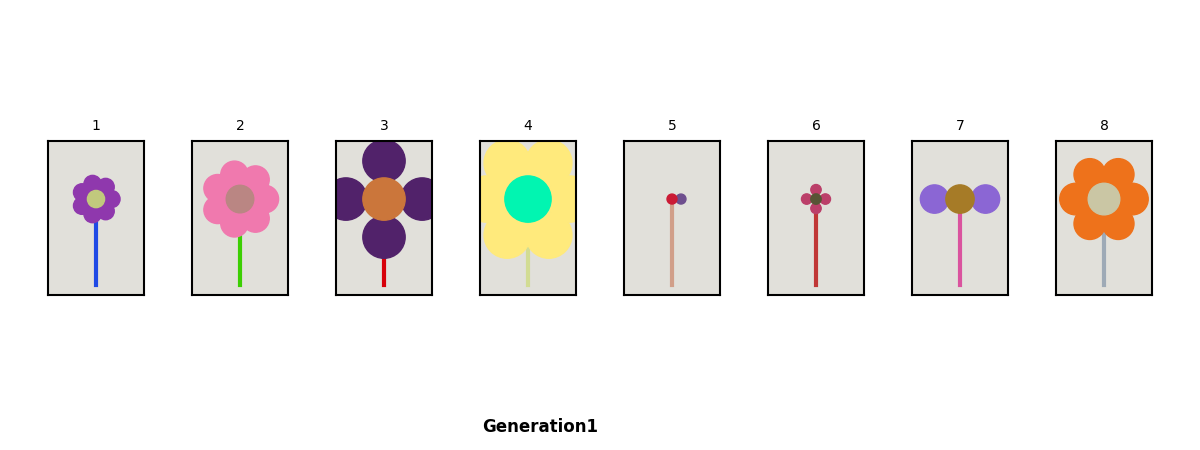

In [ ]:
# button to create first generation
def startButtonOnclick(b):
    clear_output(wait=True)
    population = initPop(population_size, gen_dict)
    draw_generation(population)




start_button = widgets.Button(description="Create First Generation",
                              button_style='success',
                              layout=widgets.Layout(width='250px',height='50px')
                              )




start_button.on_click(startButtonOnclick)
display(start_button)



